Finding optimal number of features...
Testing 30 features...


<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y
<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y


  Train: 0.724 | Val: 0.608 | Gap: 0.116
Testing 50 features...


<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y
<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y


  Train: 0.724 | Val: 0.628 | Gap: 0.096
Testing 75 features...


<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y
<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y


  Train: 0.721 | Val: 0.655 | Gap: 0.066
Testing 100 features...


<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y
<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y


  Train: 0.721 | Val: 0.581 | Gap: 0.140

Optimal number of features: 75
[Pipeline] ......... (step 1 of 6) Processing drop_cols, total=   0.0s
[Pipeline] .. (step 2 of 6) Processing target_home_team, total=   0.0s
[Pipeline] .. (step 3 of 6) Processing target_away_team, total=   0.0s
[Pipeline] ... (step 4 of 6) Processing variance_filter, total=   0.0s
[Pipeline] . (step 5 of 6) Processing feature_selection, total=   0.0s
[Pipeline] ............ (step 6 of 6) Processing scaler, total=   0.0s


<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y
<ipython-input-4-8f6303104837>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y


Selected C value: 0.013895

Final Results:
Training Accuracy: 0.7228
Validation Accuracy: 0.6732
Test Accuracy: 0.6146
Overfitting gap (train-test): 0.1082
Test Balanced Accuracy: 0.6137
Test F1-macro: 0.6108

ROC AUC Scores:
Training ROC AUC: 0.8054
Validation ROC AUC: 0.7173
Test ROC AUC: 0.6690


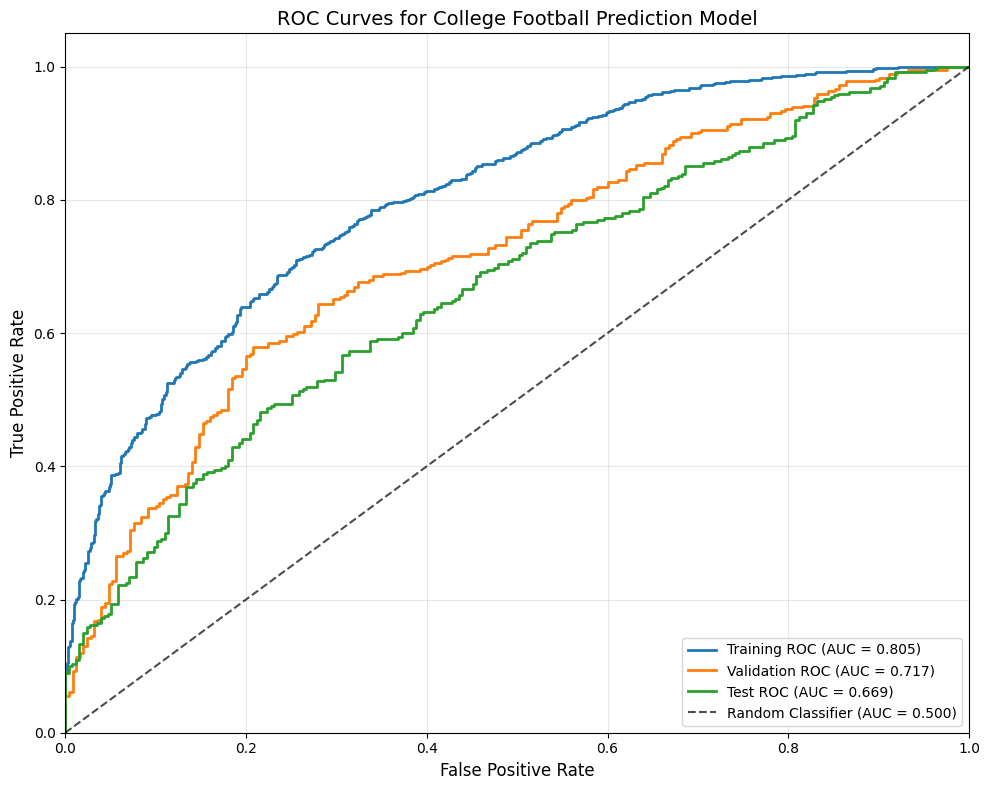

Baseline Accuracy (always predicting home team wins): 0.5764
Model Accuracy on Away Team Wins: 0.6078

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.54      0.61      0.57       255
           1       0.68      0.62      0.65       347

    accuracy                           0.61       602
   macro avg       0.61      0.61      0.61       602
weighted avg       0.62      0.61      0.62       602



In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from typing import Dict, Any, Optional, Union, List, Set, Hashable, Literal, Tuple, Self, Iterable
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings

class CustomTargetTransformer(BaseEstimator, TransformerMixin):
    """
    A target encoder that applies smoothing and returns np.nan for unseen categories.

    Parameters:
    -----------
    col: name of column to encode.
    smoothing : float, default=10.0
        Smoothing factor. Higher values give more weight to the global mean.
    """

    def __init__(self, col: str, smoothing: float =10.0):
        self.col = col
        self.smoothing = smoothing
        self.global_mean_ = None
        self.encoding_dict_ = None

    def fit(self, X, y):
        """
        Fit the target encoder using training data.

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data features.
        y : array-like of shape (n_samples,)
            Target values.
        """
        assert isinstance(X, pd.core.frame.DataFrame), f'{self.__class__.__name__}.fit expected Dataframe but got {type(X)} instead.'
        assert self.col in X, f'{self.__class__.__name__}.fit column not in X: {self.col}. Actual columns: {X.columns}'
        assert isinstance(y, Iterable), f'{self.__class__.__name__}.fit expected Iterable but got {type(y)} instead.'
        assert len(X) == len(y), f'{self.__class__.__name__}.fit X and y must be same length but got {len(X)} and {len(y)} instead.'

        #Create new df with just col and target - enables use of pandas methods below
        X_ = X[[self.col]]
        target = self.col+'_target_'
        X_[target] = y

        # Calculate global mean
        self.global_mean_ = X_[target].mean()

        # Get counts and means
        counts = X_[self.col].value_counts().to_dict()    #dictionary of unique values in the column col and their counts
        means = X_[target].groupby(X_[self.col]).mean().to_dict() #dictionary of unique values in the column col and their means

        # Calculate smoothed means
        smoothed_means = {}
        for category in counts.keys():
            n = counts[category]
            category_mean = means[category]
            # Apply smoothing formula: (n * cat_mean + m * global_mean) / (n + m)
            smoothed_mean = (n * category_mean + self.smoothing * self.global_mean_) / (n + self.smoothing)
            smoothed_means[category] = smoothed_mean

        self.encoding_dict_ = smoothed_means

        return self

    def transform(self, X):
        """
        Transform the data using the fitted target encoder.
        Unseen categories will be encoded as np.nan.

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Input data to transform.
        """

        assert isinstance(X, pd.core.frame.DataFrame), f'{self.__class__.__name__}.transform expected Dataframe but got {type(X)} instead.'
        assert self.encoding_dict_, f'{self.__class__.__name__}.transform not fitted'

        X_ = X.copy()

        # Map categories to smoothed means, naturally producing np.nan for unseen categories, i.e.,
        # when map tries to look up a value in the dictionary and doesn't find the key, it automatically returns np.nan. That is what we want.
        X_[self.col] = X_[self.col].map(self.encoding_dict_)

        return X_

    def fit_transform(self, X, y):
        """
        Fit the target encoder and transform the input data.

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data features.
        y : array-like of shape (n_samples,)
            Target values.
        """
        return self.fit(X, y).transform(X)

class CustomDropColumnsTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer that either drops or keeps specified columns in a DataFrame.

    This transformer follows the scikit-learn transformer interface and can be used in
    a scikit-learn pipeline. It allows for selectively keeping or dropping columns
    from a DataFrame based on a provided list.

    Parameters
    ----------
    column_list : List[str]
        List of column names to either drop or keep, depending on the action parameter.
    action : str, default='drop'
        The action to perform on the specified columns. Must be one of:
        - 'drop': Remove the specified columns from the DataFrame
        - 'keep': Keep only the specified columns in the DataFrame

    Attributes
    ----------
    column_list : List[str]
        The list of column names to operate on.
    action : str
        The action to perform ('drop' or 'keep').

    Examples
    --------
    >>> import pandas as pd
    >>> df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
    >>>
    >>> # Drop columns example
    >>> dropper = CustomDropColumnsTransformer(column_list=['A', 'B'], action='drop')
    >>> dropped_df = dropper.fit_transform(df)
    >>> dropped_df.columns.tolist()
    ['C']
    >>>
    >>> # Keep columns example
    >>> keeper = CustomDropColumnsTransformer(column_list=['A', 'C'], action='keep')
    >>> kept_df = keeper.fit_transform(df)
    >>> kept_df.columns.tolist()
    ['A', 'C']
    """

    def __init__(self, column_list: List[str], action: Literal['drop', 'keep'] = 'drop') -> None:
        """
        Initialize the CustomDropColumnsTransformer.

        Parameters
        ----------
        column_list : List[str]
            List of column names to either drop or keep.
        action : str, default='drop'
            The action to perform on the specified columns.
            Must be either 'drop' or 'keep'.

        Raises
        ------
        AssertionError
            If action is not 'drop' or 'keep', or if column_list is not a list.
        """
        assert action in ['keep', 'drop'], f'DropColumnsTransformer action {action} not in ["keep", "drop"]'
        assert isinstance(column_list, list), f'DropColumnsTransformer expected list but saw {type(column_list)}'
        self.column_list: List[str] = column_list
        self.action: Literal['drop', 'keep'] = action

    #your code below
    def fit(self, X: pd.DataFrame, y: Optional[Iterable] = None) -> Self:
        """
        Fit method - performs no actual fitting operation.
        """
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        """
        Drop or keep the specified columns in the input DataFrame.

        Parameters
        ----------
        X : pandas.DataFrame
            The DataFrame to transform

        Returns
        -------
        pandas.DataFrame
            A copy of the input DataFrame with specified columns dropped or kept.

        Raises
        ------
        AssertionError
            If X is not a pandas DataFrame or if column_list contains columns not in X.
        """
        assert isinstance(X, pd.DataFrame), f'DropColumnsTransformer.transform expected Dataframe but got {type(X)} instead.'
        missing_cols = set(self.column_list) - set(X.columns)
        if missing_cols:
            if self.action == 'drop':
                warnings.warn(f"Warning: CustomDropColumnsTransformer does not contain these columns to drop: {missing_cols}", stacklevel=2)
            else:
                raise AssertionError(f"CustomDropColumnsTransformer does not contain these columns to keep: {missing_cols}")

        if self.action == 'drop':
            X_ = X.drop(columns=self.column_list, errors='ignore')
        else:
            X_ = X[self.column_list]

        return X_

        def fit_transform(self, X: pd.DataFrame, y: Optional[Iterable] = None) -> pd.DataFrame:
          """
          Fit and transform the data
          """
          #self.fit(X, y)
          return self.transform(X)

def find_optimal_features(X_train, y_train, X_val, y_val, feature_counts=[30, 50, 75, 100]):
    """Find the optimal number of features to minimize overfitting"""
    results = []

    for k in feature_counts:
        print(f"Testing {k} features...")

        pipeline = Pipeline(steps=[
            ('drop_cols', CustomDropColumnsTransformer(column_list=drop_cols, action='drop')),
            ('target_home_team', CustomTargetTransformer(col='home_team', smoothing=15)),
            ('target_away_team', CustomTargetTransformer(col='away_team', smoothing=15)),
            ('variance_filter', VarianceThreshold(threshold=0.01)),
            ('feature_selection', SelectKBest(f_classif, k=k)),
            ('scaler', StandardScaler()),
            ('logreg', LogisticRegressionCV(
                Cs=np.logspace(-3, 1, 10),
                cv=5,
                max_iter=2000,
                random_state=42,
                scoring='f1_macro',
                class_weight='balanced',
                n_jobs=-1
            ))
        ])

        # Fit and evaluate
        pipeline.fit(X_train, y_train)

        train_score = pipeline.score(X_train, y_train)
        val_score = pipeline.score(X_val, y_val)
        overfitting = train_score - val_score

        results.append({
            'features': k,
            'train_score': train_score,
            'val_score': val_score,
            'overfitting': overfitting
        })

        print(f"  Train: {train_score:.3f} | Val: {val_score:.3f} | Gap: {overfitting:.3f}")


    results_df = pd.DataFrame(results)
    # Choose the model with highest validation score among those with overfitting < 0.05
    reasonable_models = results_df[results_df['overfitting'] < 0.05]
    if len(reasonable_models) > 0:
        best_k = reasonable_models.loc[reasonable_models['val_score'].idxmax(), 'features']
    else:
        best_k = results_df.loc[results_df['overfitting'].idxmin(), 'features']

    return int(best_k), results_df


drop_cols = [
    'id', 'season', 'season_type',
    'start_date', 'neutral_site', 'conference_game',
    'home_level', 'away_level', 'home_points', 'away_points',
    'home_id', 'away_id'
]

train_df = pd.read_csv("final_merged_training_2020_2022.csv")
val_df = pd.read_csv("final_merged_valadation_2023.csv")
test_df = pd.read_csv("final_merged_test_2024.csv")

cols_to_drop = ['home_kickoff_touchbacks_y', 'away_kickoff_touchbacks_y']
test_df = test_df.drop(columns=cols_to_drop)

# Rename _x columns to original names
test_df = test_df.rename(columns={
    'home_kickoff_touchbacks_x': 'home_kickoff_touchbacks',
    'away_kickoff_touchbacks_x': 'away_kickoff_touchbacks'
})

columns_to_fill = [
    ("home_rolling_avg_points_scored", "home_team"),
    ("home_rolling_avg_points_allowed", "home_team"),
    ("home_rolling_win_pct", "home_team"),
    ("away_rolling_avg_points_scored", "away_team"),
    ("away_rolling_avg_points_allowed", "away_team"),
    ("away_rolling_win_pct", "away_team")
]


for df in [train_df, val_df, test_df]:
    for col, team_col in columns_to_fill:
        if col in df.columns and team_col in df.columns:
            team_means = df.groupby(team_col)[col].transform("mean")
            df[col] = df[col].fillna(team_means)
            overall_mean = df[col].mean()
            df[col] = df[col].fillna(overall_mean)

target_col = 'winner'

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_val = val_df.drop(columns=[target_col])
y_val = val_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

X_val = X_val[X_train.columns]
X_test = X_test[X_train.columns]

print("Finding optimal number of features...")
optimal_k, feature_results = find_optimal_features(X_train, y_train, X_val, y_val)
print(f"\nOptimal number of features: {optimal_k}")

cfbpredictor_transformer = Pipeline(steps=[
    ('drop_cols', CustomDropColumnsTransformer(column_list=drop_cols, action='drop')),
    ('target_home_team', CustomTargetTransformer(col='home_team', smoothing=15)),
    ('target_away_team', CustomTargetTransformer(col='away_team', smoothing=15)),
    ('variance_filter', VarianceThreshold(threshold=0.01)),
    ('feature_selection', SelectKBest(f_classif, k=optimal_k)),
    ('scaler', StandardScaler()),
], verbose=True)

model_pipeline = Pipeline(steps=[
    ('preprocessing', cfbpredictor_transformer),
    ('logreg', LogisticRegressionCV(
        Cs=np.logspace(-3, 1, 15),
        cv=5,
        max_iter=1000,
        random_state=42,
        scoring='f1_macro',
        class_weight='balanced',
        n_jobs=-1
    ))
])

# Fit the model pipeline on training data
model_pipeline.fit(X_train, y_train)
selected_C = model_pipeline.named_steps['logreg'].C_[0]
print(f'Selected C value: {selected_C:.6f}')

# Predict and evaluate
y_train_pred = model_pipeline.predict(X_train)
y_val_pred = model_pipeline.predict(X_val)
y_test_pred = model_pipeline.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)
balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
f1_macro = f1_score(y_test, y_test_pred, average='macro')

print(f'\nFinal Results:')
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Overfitting gap (train-test): {train_acc - test_acc:.4f}')
print(f'Test Balanced Accuracy: {balanced_acc:.4f}')
print(f'Test F1-macro: {f1_macro:.4f}')

# Calculate ROC AUC scores
y_train_proba = model_pipeline.predict_proba(X_train)[:, 1]
y_val_proba = model_pipeline.predict_proba(X_val)[:, 1]
y_test_proba = model_pipeline.predict_proba(X_test)[:, 1]
train_roc_auc = roc_auc_score(y_train, y_train_proba)
val_roc_auc = roc_auc_score(y_val, y_val_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f'\nROC AUC Scores:')
print(f'Training ROC AUC: {train_roc_auc:.4f}')
print(f'Validation ROC AUC: {val_roc_auc:.4f}')
print(f'Test ROC AUC: {test_roc_auc:.4f}')

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Training ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {train_roc_auc:.3f})', linewidth=2)

# Validation ROC
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
plt.plot(fpr_val, tpr_val, label=f'Validation ROC (AUC = {val_roc_auc:.3f})', linewidth=2)

# Test ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_roc_auc:.3f})', linewidth=2)

# Random classifier baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)', alpha=0.7)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for College Football Prediction Model', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Baseline comparison
always_home_baseline_acc = (y_test == 1).mean()
print(f'Baseline Accuracy (always predicting home team wins): {always_home_baseline_acc:.4f}')

# Away team performance
away_win_mask = (y_test == 0)
away_win_acc = (y_test_pred[away_win_mask] == 0).mean()
print(f'Model Accuracy on Away Team Wins: {away_win_acc:.4f}')

# Classification report
print('\nClassification Report (Test):')
print(classification_report(y_test, y_test_pred))
